In [2]:
import pandas as pd       # 141
from matplotlib import pyplot as plt
file_path = r"D:\Users\acer\Desktop\所有的文件\python资料\课件资料\1-6\数据分析资料\day05\code\books.csv"

In [6]:
# 读取数据
df = pd.read_csv(file_path)
print(df.head(2))
print(df.info)

   id  book_id  best_book_id  work_id  books_count       isbn        isbn13  \
0   1  2767052       2767052  2792775          272  439023483  9.780439e+12   
1   2        3             3  4640799          491  439554934  9.780440e+12   

                       authors  original_publication_year  \
0              Suzanne Collins                     2008.0   
1  J.K. Rowling, Mary GrandPré                     1997.0   

                             original_title  ... ratings_count  \
0                          The Hunger Games  ...       4780653   
1  Harry Potter and the Philosopher's Stone  ...       4602479   

  work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  \
0            4942365                   155254      66715     127936   
1            4800065                    75867      75504     101676   

   ratings_3  ratings_4  ratings_5  \
0     560092    1481305    2706317   
1     455024    1156318    3011543   

                                           image_u

In [10]:
# 使用分组之前，要先将数据中没有分类标签的数据除去
data1 = df[pd.notnull(df["original_publication_year"])]
# 进行分组统计数据,得到不同年份书的平均评分情况
grouped_rating_mean = data1.groupby(by=data1["original_publication_year"])["average_rating"].mean()
print(grouped_rating_mean)

original_publication_year
-1750.0    3.630000
-762.0     4.030000
-750.0     4.005000
-720.0     3.730000
-560.0     4.050000
             ...   
 2013.0    4.012297
 2014.0    3.985378
 2015.0    3.954641
 2016.0    4.027576
 2017.0    4.100909
Name: average_rating, Length: 293, dtype: float64


<Figure size 1600x640 with 0 Axes>

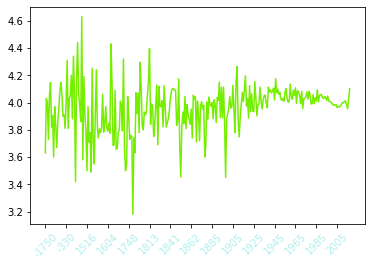

<Figure size 1600x640 with 0 Axes>

In [21]:
# 画图呈现
_x = grouped_rating_mean.index
# _x = [int(i) for i in _x]
_y = grouped_rating_mean.values
plt.plot(range(len(_x)),_y,color="#76EE00")    # 折线图
# 通过astype来改变_x中的格式,比上面用循环来整，感觉要简洁一些（.astype是numpy中的，但在pandas中好像也可以）
plt.xticks(range(len(_x))[::20],_x[::20].astype(int),rotation=45,color="#AFEEEE")
plt.figure(figsize=(20,8),dpi=80)             # 这句要放在最后面